In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
scores = pd.read_excel('../data/results/master_results.xlsx',sheet_name=None)

In [3]:
scores['consolidated']

,ts,model_tag,model_dir,metric,score
0,2024-01-02 13:00:36,bert-base-uncased,NaN,crows-pairs,60.480000
1,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,68.162956
2,2024-01-02 13:05:13,bert-base-uncased,NaN,crows-pairs,60.480000
3,2024-01-02 13:06:02,bert-base-uncased,NaN,stereoset,68.162956
4,2024-01-02 13:09:55,bert-base-uncased,NaN,crows-pairs,60.480000
...,...,...,...,...,...
173,2024-01-30 04:25:27,albert-base-v2_random_init_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,stereoset,47.198131
174,2024-01-30 06:54:35,albert-base-v2_random_init_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,ceat,0.218763
175,2024-01-30 06:59:48,albert-base-v2_random_init_FT_imdb,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,crows-pairs,44.360000
176,2024-01-30 07:00:53,albert-base-v2_random_init_FT_imdb,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,stereoset,60.160403


In [4]:
cons = scores['consolidated']
cons.head()

,ts,model_tag,model_dir,metric,score
0,2024-01-02 13:00:36,bert-base-uncased,NaN,crows-pairs,60.480000
1,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,68.162956
2,2024-01-02 13:05:13,bert-base-uncased,NaN,crows-pairs,60.480000
3,2024-01-02 13:06:02,bert-base-uncased,NaN,stereoset,68.162956
4,2024-01-02 13:09:55,bert-base-uncased,NaN,crows-pairs,60.480000


In [5]:
## Dropping all duplicated rows
cons = cons.drop_duplicates(subset=['model_tag','metric'],keep='last').sort_values('model_tag').reset_index(drop = True)

In [6]:
def separate_model_mode(x):

    is_random = False
    mode = 'base'
    ft_ds = 'None'
    id = 'base'

    x = x.split('_')
    
    if('random' in x):
        is_random = True
        id = 'random'
    if('FT' in x):
        mode = 'FT'
        if('imdb' in x):
            ft_ds = 'imdb'
        elif('4chan' in x):
            ft_ds = '4chan'
        
        id+='_'+ft_ds
    
    return is_random,mode,ft_ds,id

In [7]:
# cons[['model_tag','metric','score']].to_excel('../data/results/presentation/consolidated.xlsx',index=False)

In [8]:
# df = pd.DataFrame(cons.loc[cons['metric']=='ceat'].groupby('model_tag')['score'].mean()).reset_index()
# df['base_model_tag'] = df['model_tag'].apply(lambda x : x.split('_')[0])

# for bmt in np.unique((df['base_model_tag'])):
    
#     tmp = df.loc[df['base_model_tag']==bmt]
#     # tmp.plot.barh(x='model_tag',y='score')

In [9]:
cons.head()

,ts,model_tag,model_dir,metric,score
0,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,70.350657
1,2024-01-05 12:45:16,albert-base-v2,NaN,crows-pairs,56.760000
2,2024-01-12 11:43:39,albert-base-v2,NaN,ceat,0.092961
3,2024-01-09 12:12:50,albert-base-v2_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,stereoset,59.148954
4,2024-01-09 12:11:57,albert-base-v2_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,crows-pairs,51.260000


In [10]:
cons['base_model_tag'] = cons['model_tag'].apply(lambda x : x.split('_')[0])
# cons['model_mode'] = cons['model_tag'].apply(lambda x : separate_model_mode(x))
cons['is_random'],cons['model_mode'],cons['ft_ds'],cons['model_id'] = zip(*cons['model_tag'].map(separate_model_mode))

In [11]:
cons.head()

,ts,model_tag,model_dir,metric,score,base_model_tag,is_random,model_mode,ft_ds,model_id
0,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,70.350657,albert-base-v2,False,base,None,base
1,2024-01-05 12:45:16,albert-base-v2,NaN,crows-pairs,56.760000,albert-base-v2,False,base,None,base
2,2024-01-12 11:43:39,albert-base-v2,NaN,ceat,0.092961,albert-base-v2,False,base,None,base
3,2024-01-09 12:12:50,albert-base-v2_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,stereoset,59.148954,albert-base-v2,False,FT,4chan,base_4chan
4,2024-01-09 12:11:57,albert-base-v2_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,crows-pairs,51.260000,albert-base-v2,False,FT,4chan,base_4chan


In [12]:
cons['model_id'].unique()

array(['base', 'base_4chan', 'base_imdb', 'random', 'random_4chan',
       'random_imdb'], dtype=object)

In [13]:
cons = cons[['metric','score','model_id',]].groupby(['model_id','metric']).mean().reset_index()

In [14]:
cons.head()

,model_id,metric,score
0,base,ceat,0.364428
1,base,crows-pairs,56.632000
2,base,stereoset,67.579259
3,base_4chan,ceat,0.655839
4,base_4chan,crows-pairs,55.544000


In [15]:
# cons[['metric','score','model_mode']].pivot(index='model_mode',columns='metric',values='score').to_excel('../data/results/presentation/cons_overall.xlsx',index=True)

In [16]:
cons[['metric','score','model_id']].pivot(index='model_id',columns='metric',values='score')

metric,ceat,crows-pairs,stereoset
model_id,,,
base,0.364428,56.632,67.579259
base_4chan,0.655839,55.544,64.964831
base_imdb,0.655473,56.274,66.378948
random,0.153911,50.862,47.836745
random_4chan,0.172063,50.068,46.153698
random_imdb,0.163784,47.400,58.194847


In [17]:
cp = scores['crows-pairs']
## Dropping all duplicated rows
cp = cp.drop_duplicates(subset=['model_name','metric'],keep='last').sort_values('model_name').reset_index(drop = True)
cp['base_model_tag'] = cp['model_name'].apply(lambda x : x.split('_')[0])
cp['is_random'],cp['model_mode'],cp['ft_ds'],cp['model_id'] = zip(*cp['model_name'].map(separate_model_mode))
cp.head()

,total_examples,metric_score,stereotype_score,anti-stereotype_score:,num_neutral,ts,model_name,model_dir,metric,base_model_tag,is_random,model_mode,ft_ds,model_id
0,1508,56.76,56.20,60.09,0,2024-01-05 12:45:16,albert-base-v2,NaN,crows-pairs,albert-base-v2,False,base,None,base
1,1508,51.26,51.86,48.17,2,2024-01-09 12:11:57,albert-base-v2_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,crows-pairs,albert-base-v2,False,FT,4chan,base_4chan
2,1508,51.59,53.43,42.86,9,2024-01-09 14:04:48,albert-base-v2_FT_imdb,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,crows-pairs,albert-base-v2,False,FT,imdb,base_imdb
3,1508,46.29,46.61,46.30,9,2024-01-09 15:59:34,albert-base-v2_random_init,random init,crows-pairs,albert-base-v2,True,base,None,random
4,1508,46.42,45.19,61.68,37,2024-01-30 04:24:22,albert-base-v2_random_init_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,crows-pairs,albert-base-v2,True,FT,4chan,random_4chan


In [18]:
# cp[['metric_score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='metric_score').to_excel('../data/results/presentation/cp_metric.xlsx')
cp[['metric_score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='metric_score')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,56.76,51.26,51.59,46.29,46.42,44.36
bert-base-cased,55.11,55.77,54.58,50.66,49.01,48.54
bert-base-uncased,60.48,59.08,60.08,56.43,56.43,44.96
distilbert-base-uncased,56.83,56.30,59.22,48.81,45.23,50.27
roberta-base,53.98,55.31,55.90,52.12,53.25,48.87


In [19]:
cp_long = pd.melt(cp,value_vars=['metric_score','stereotype_score','anti-stereotype_score:'],id_vars=['model_name','base_model_tag','model_id'],
                  var_name = 'Score Type')
cp_long.head()

,model_name,base_model_tag,model_id,Score Type,value
0,albert-base-v2,albert-base-v2,base,metric_score,56.76
1,albert-base-v2_FT_4chan,albert-base-v2,base_4chan,metric_score,51.26
2,albert-base-v2_FT_imdb,albert-base-v2,base_imdb,metric_score,51.59
3,albert-base-v2_random_init,albert-base-v2,random,metric_score,46.29
4,albert-base-v2_random_init_FT_4chan,albert-base-v2,random_4chan,metric_score,46.42


Text(0.5, 1.0, 'Distribution of scores with CrowS-Pairs dataset for different model types.')

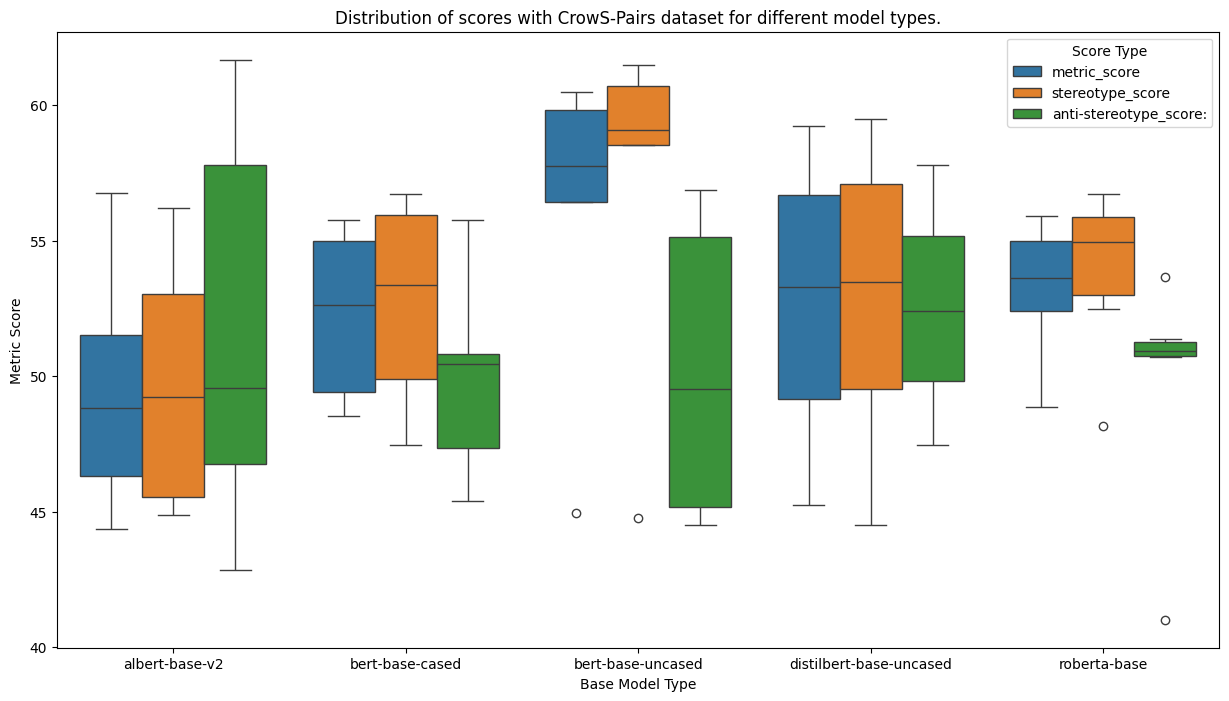

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='base_model_tag', y='value', hue='Score Type', data=cp_long, ax = ax)
plt.xlabel('Base Model Type')
plt.ylabel('Metric Score')
plt.title('Distribution of scores with CrowS-Pairs dataset for different model types.')

Text(0.5, 1.0, 'Distribution of scores with CrowS-Pairs dataset for different model setups.')

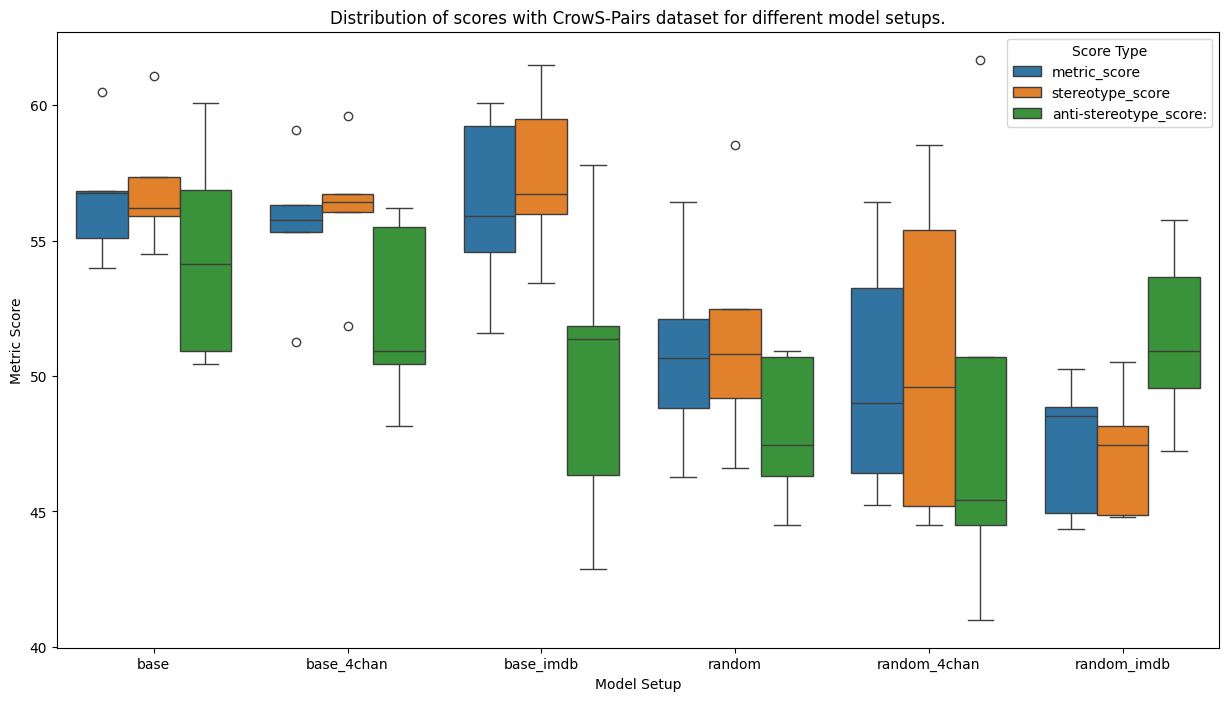

In [21]:
# cp.boxplot(column='metric_score',by='model_mode', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='model_id', y='value', hue='Score Type', data=cp_long, ax = ax)
plt.xlabel('Model Setup')
plt.ylabel('Metric Score')
plt.title('Distribution of scores with CrowS-Pairs dataset for different model setups.')

In [22]:
stereo = scores['stereoset']
## Dropping all duplicated rows
stereo = stereo.drop_duplicates(subset=['model_name','metric','category'],keep='last').sort_values('model_name').reset_index(drop = True)
stereo['base_model_tag'] = stereo['model_name'].apply(lambda x : x.split('_')[0])
stereo['is_random'],stereo['model_mode'],stereo['ft_ds'],stereo['model_id'] = zip(*stereo['model_name'].map(separate_model_mode))
stereo.head()

,category,Count,LM Score,SS Score,ICAT Score,ts,model_name,model_dir,metric,base_model_tag,is_random,model_mode,ft_ds,model_id
0,gender,765,90.726705,63.576544,66.091604,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,False,base,None,base
1,profession,2430,90.079389,64.575036,63.821183,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,False,base,None,base
2,race,2886,91.617948,57.913567,77.117452,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,False,base,None,base
3,religion,237,90.459770,61.425287,69.789193,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,False,base,None,base
4,overall,2106,90.876888,61.293428,70.350657,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,False,base,None,base


In [23]:
stereo['category'].unique()

array(['gender', 'profession', 'race', 'religion', 'overall'],
      dtype=object)

In [24]:
# (stereo.loc[stereo['category']=='overall',['ICAT Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='ICAT Score')).to_excel('../data/results/presentation/ss_icat.xlsx')
stereo.loc[stereo['category']=='overall',['ICAT Score','base_model_tag','model_id']].pivot(index='base_model_tag',columns='model_id',values='ICAT Score')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,70.350657,59.148954,60.118525,50.303832,47.198131,60.160403
bert-base-cased,68.606505,67.636817,69.954808,50.249710,45.295681,60.104526
bert-base-uncased,68.162956,68.657688,69.381677,46.441904,46.441904,61.402166
distilbert-base-uncased,66.965151,64.862856,66.908155,47.678350,46.275735,59.448650
roberta-base,63.811029,64.517837,65.531572,44.509929,45.557038,49.858490


Text(0.5, 1.0, 'Distribution of ICAT scores with StereoSet for different model setups.')

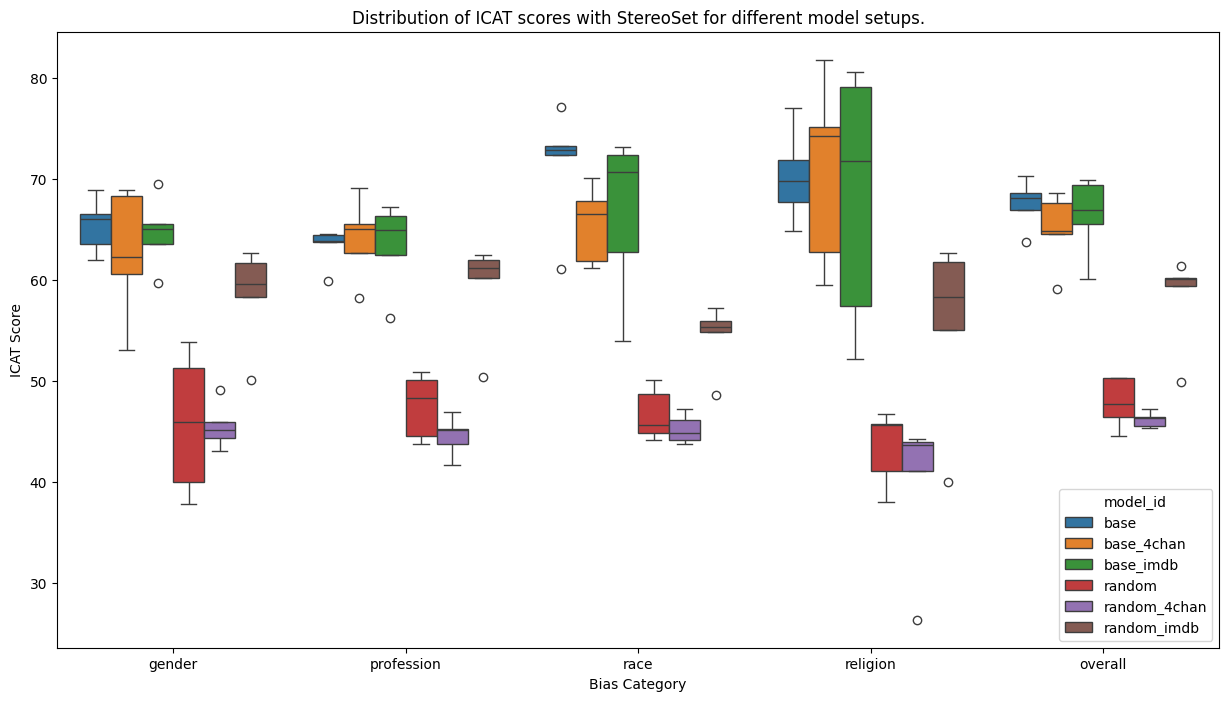

In [25]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='category', y='ICAT Score', hue='model_id', data=stereo, ax = ax, order = ['gender', 'profession', 'race', 'religion', 'overall'])
plt.xlabel('Bias Category')
plt.ylabel('ICAT Score')
plt.title('Distribution of ICAT scores with StereoSet for different model setups.')

In [26]:
ceat = scores['ceat']
ceat = ceat[['group', 'PES', 'p-value', 'model_name']].groupby(['model_name','group'],as_index=False).mean().sort_values(['model_name','group'])
ceat['base_model_tag'] = ceat['model_name'].apply(lambda x : x.split('_')[0])
ceat['is_random'],ceat['model_mode'],ceat['ft_ds'],ceat['model_id'] = zip(*ceat['model_name'].map(separate_model_mode))
ceat.head()

,model_name,group,PES,p-value,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,0,0.096925,0.000000e+00,albert-base-v2,False,base,None,base
1,albert-base-v2,1,0.154157,1.668006e-43,albert-base-v2,False,base,None,base
2,albert-base-v2,2,0.278656,1.277421e-133,albert-base-v2,False,base,None,base
3,albert-base-v2,3,0.015568,4.025807e-02,albert-base-v2,False,base,None,base
4,albert-base-v2,4,0.058149,1.947189e-07,albert-base-v2,False,base,None,base


In [27]:
ceat['group'] = ceat['group'].apply(lambda x : 'Group_'+str(x))

In [28]:
ceat.head()

,model_name,group,PES,p-value,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,Group_0,0.096925,0.000000e+00,albert-base-v2,False,base,None,base
1,albert-base-v2,Group_1,0.154157,1.668006e-43,albert-base-v2,False,base,None,base
2,albert-base-v2,Group_2,0.278656,1.277421e-133,albert-base-v2,False,base,None,base
3,albert-base-v2,Group_3,0.015568,4.025807e-02,albert-base-v2,False,base,None,base
4,albert-base-v2,Group_4,0.058149,1.947189e-07,albert-base-v2,False,base,None,base


In [29]:
ceat['group'].unique()

array(['Group_0', 'Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5',
       'Group_6', 'Group_7', 'Group_8', 'Group_9', 'Group_10', 'Group_11',
       'Group_12', 'Group_13', 'Group_14'], dtype=object)

In [30]:
ceat_overall = ceat.loc[(ceat['group']=='Group_0') &
            (ceat['base_model_tag']!='roberta-base')].sort_values('base_model_tag')
ceat_overall.head()

,model_name,group,PES,p-value,base_model_tag,is_random,model_mode,ft_ds,model_id
0,albert-base-v2,Group_0,0.096925,0.0,albert-base-v2,False,base,None,base
15,albert-base-v2_FT_4chan,Group_0,0.864487,0.0,albert-base-v2,False,FT,4chan,base_4chan
30,albert-base-v2_FT_imdb,Group_0,0.880286,0.0,albert-base-v2,False,FT,imdb,base_imdb
45,albert-base-v2_random_init,Group_0,0.171348,0.0,albert-base-v2,True,base,None,random
60,albert-base-v2_random_init_FT_4chan,Group_0,0.218763,0.0,albert-base-v2,True,FT,4chan,random_4chan


In [31]:
# ceat_overall[['base_model_tag','model_mode','PES']].pivot(index='base_model_tag',columns='model_mode',values='PES').to_excel('../data/results/presentation/ceat_overall.xlsx')
ceat_overall[['base_model_tag','model_id','PES']].pivot(index='base_model_tag',columns='model_id',values='PES')

model_id,base,base_4chan,base_imdb,random,random_4chan,random_imdb
base_model_tag,,,,,,
albert-base-v2,0.096925,0.864487,0.880286,0.171348,0.218763,0.248425
bert-base-cased,0.726149,0.636164,0.684012,0.147194,0.210381,0.105673
bert-base-uncased,0.446578,0.488185,0.457490,0.176702,0.079086,0.100828
distilbert-base-uncased,0.558243,0.626683,0.605267,0.142565,0.180021,0.200211


Text(0.5, 1.0, 'Distribution of CES scores with CEAT for different models.')

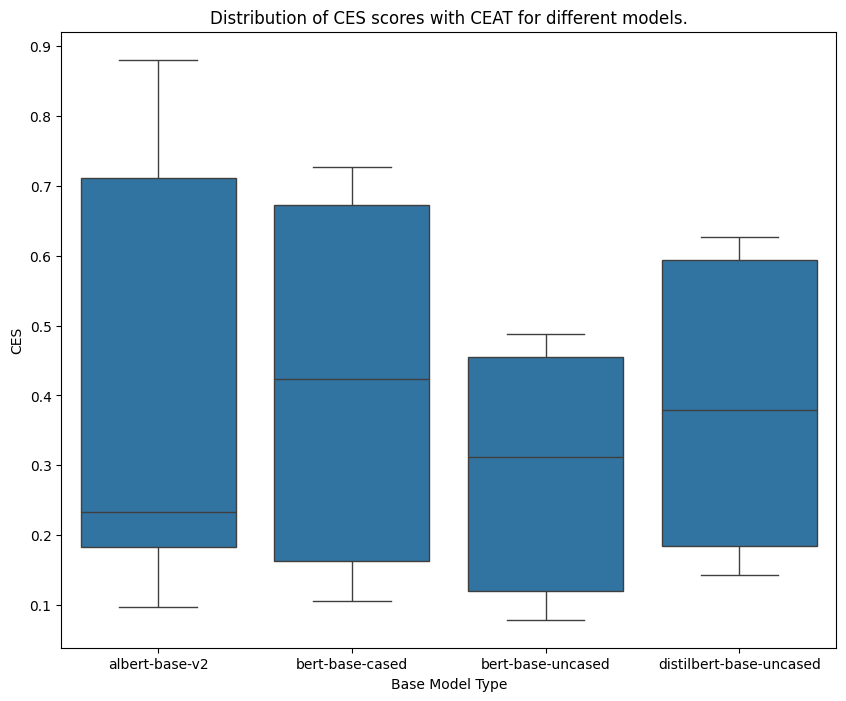

In [32]:
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.boxplot(x='group', y='PES', hue='model_mode', data=ceat, ax = ax)
# ceat.boxplot(column='PES',by='model_mode', figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='base_model_tag', y='PES', data=ceat.loc[(ceat['group']=='Group_0') & ((ceat['base_model_tag']!='roberta-base'))], ax = ax)
plt.xlabel('Base Model Type')
plt.ylabel('CES')
plt.title('Distribution of CES scores with CEAT for different models.')

In [33]:
ceat['group'].unique()

array(['Group_0', 'Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5',
       'Group_6', 'Group_7', 'Group_8', 'Group_9', 'Group_10', 'Group_11',
       'Group_12', 'Group_13', 'Group_14'], dtype=object)

In [34]:
ceat = ceat.loc[(ceat['base_model_tag']!='roberta-base')].sort_values('base_model_tag')
ceat = ceat.rename(columns={'model_id':'Model Setup','PES':'CES'})

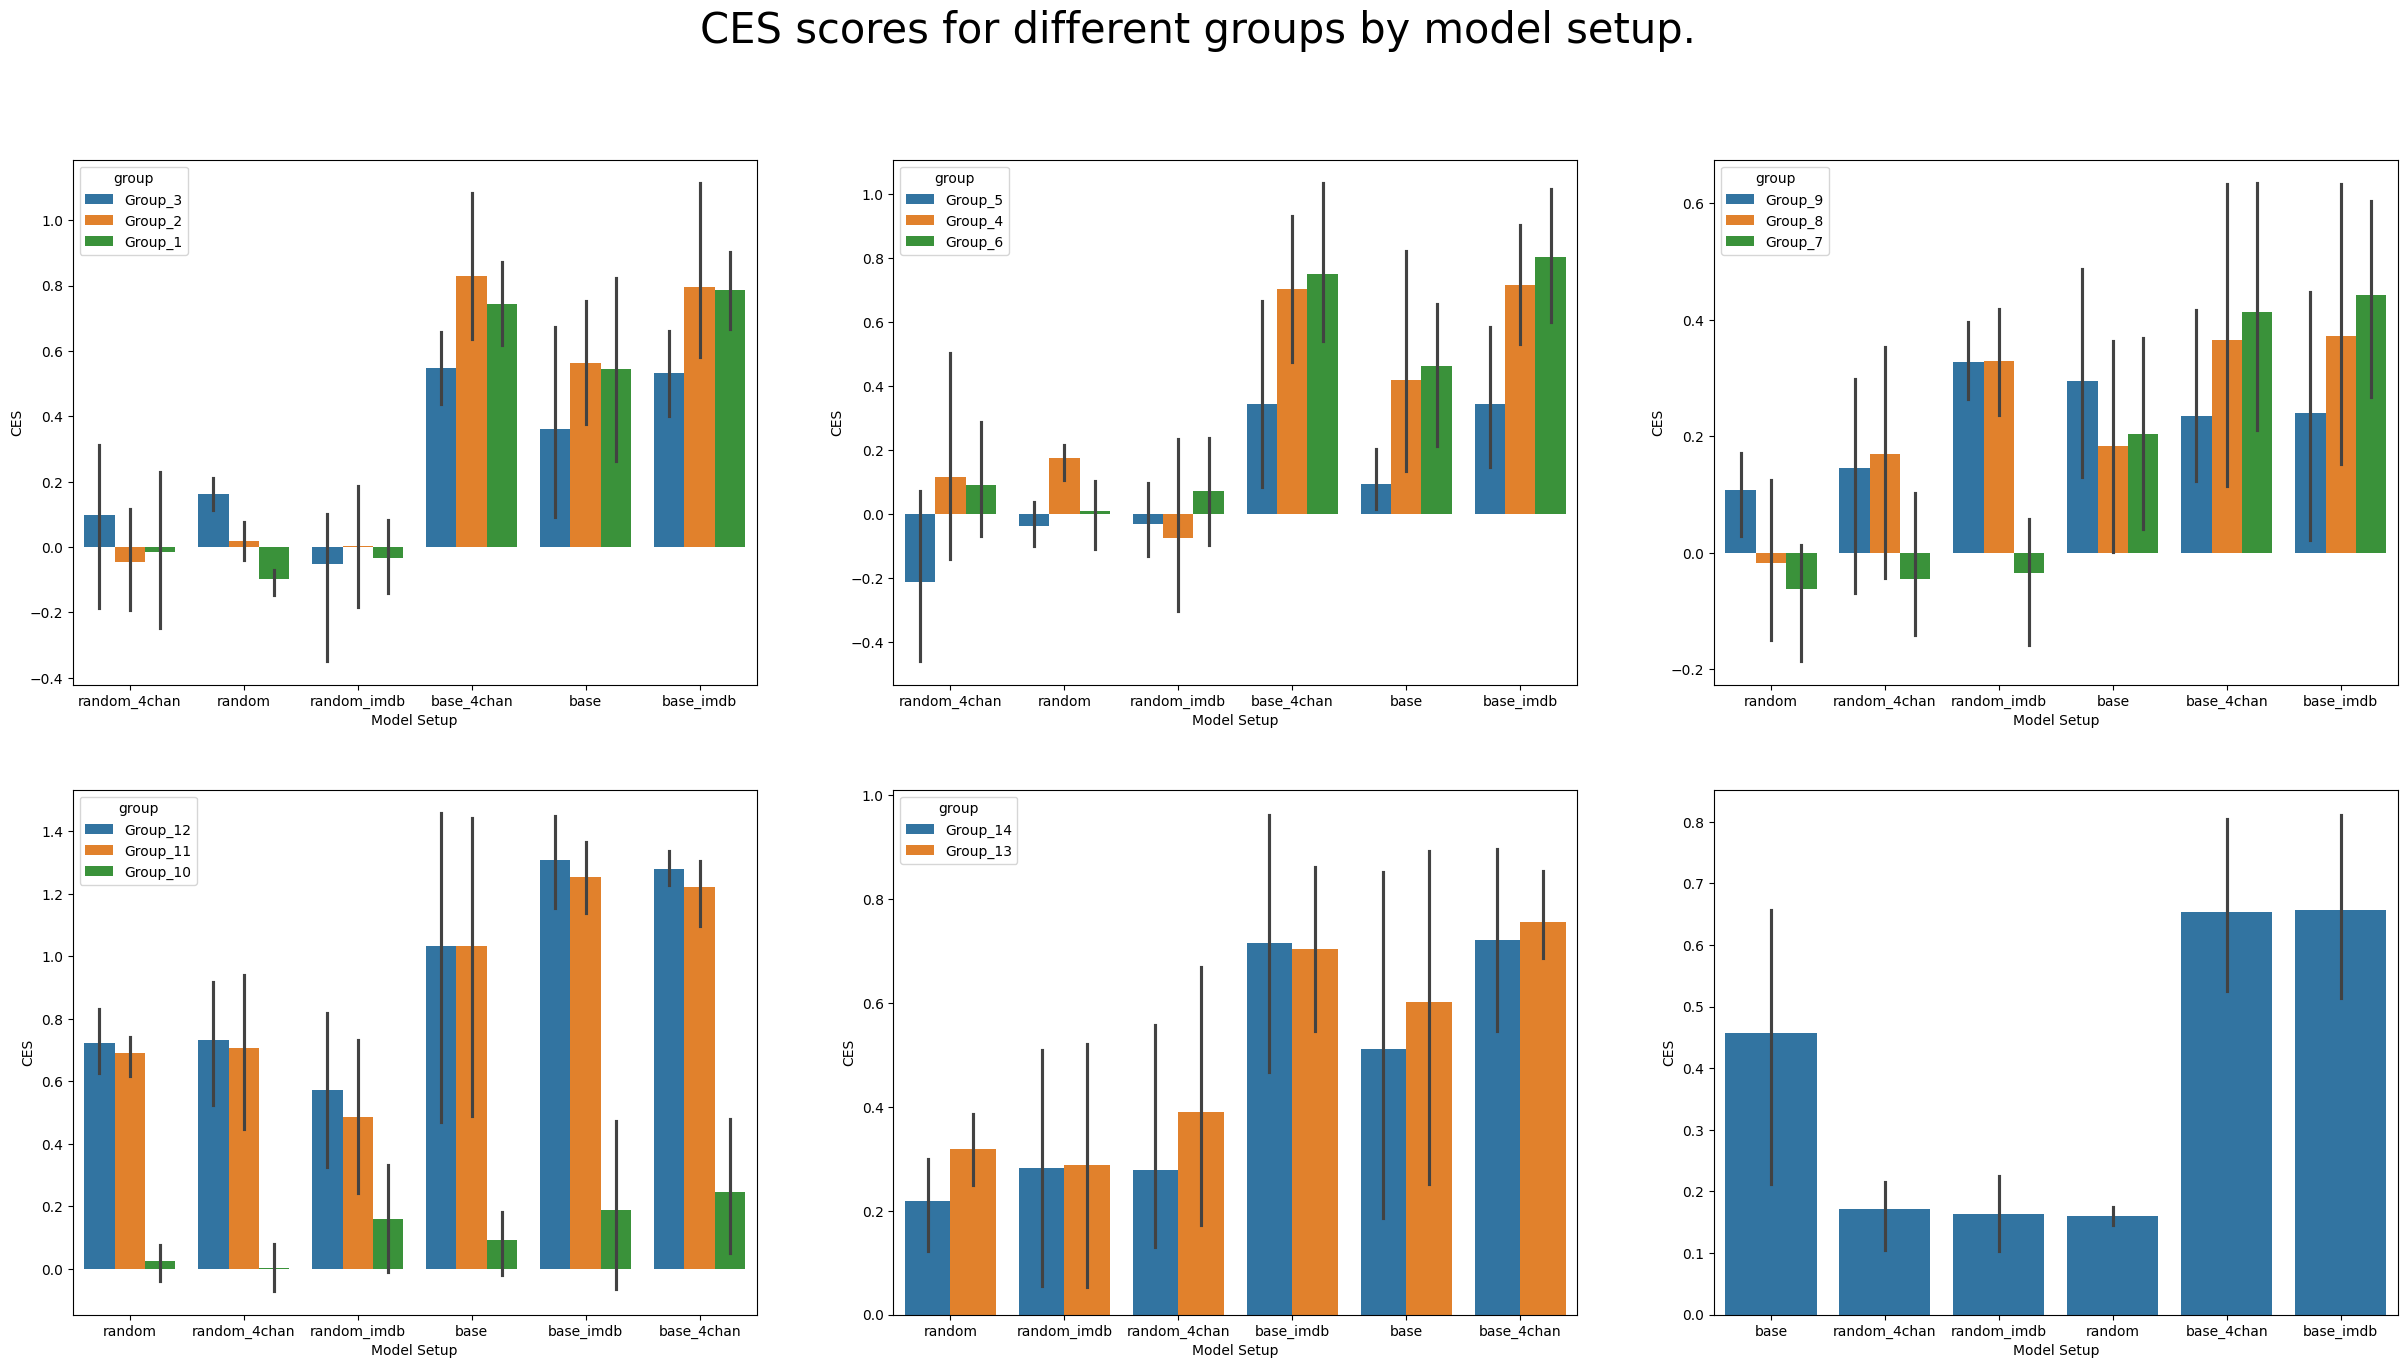

In [35]:
fig, ax = plt.subplots(2,3, figsize=(30, 15))

sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_1', 'Group_2', 'Group_3'])], hue = 'group' , ax = ax[0,0])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_4', 'Group_5', 'Group_6'])], hue = 'group' , ax = ax[0,1])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_7', 'Group_8', 'Group_9'])], hue = 'group' , ax = ax[0,2])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_10', 'Group_11', 'Group_12'])], hue = 'group' , ax = ax[1,0])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_13', 'Group_14'])], hue = 'group' , ax = ax[1,1])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_0'])], ax = ax[1,2])
# plt.xlabel('Model Setup')
# plt.ylabel('CES')
# plt.title('')
fig.suptitle('CES scores for different groups by model setup.', fontsize = 30)
plt.show()